In [5]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML, display

def print_and_display_video_stats(
    mp4_path,
    show_hist=False,
    show_video=False,
    max_frames_to_report=0,
    video_width=400
):
    """
    Reads an MP4 file and prints:
      - Per-frame min/max pixel intensities (up to max_frames_to_report frames)
      - Overall frame count
      - Resolution (H,W,C)
      - Min/Max/Mean/Std intensity
      - (Optional) a combined histogram of pixel intensities (0..255)
      - (Optional) embeds the video in the notebook

    Args:
        mp4_path (str): Path to the MP4 file.
        show_hist (bool): If True, displays a combined histogram plot at the end.
        show_video (bool): If True, displays an embedded HTML <video> player in the notebook.
        max_frames_to_report (int): Limits the number of frames for which we print min/max.
        video_width (int): Width (in pixels) for the embedded video player if show_video=True.
    """
    try:
        reader = imageio.get_reader(mp4_path, "ffmpeg")
    except Exception as e:
        print(f"ERROR: Unable to open {mp4_path} with imageio: {e}")
        return

    # We'll store sums in double precision (float64)
    sum_pixels = np.float64(0.0)
    sum_squares = np.float64(0.0)

    min_val_global = 255
    max_val_global = 0
    frame_count = 0

    # We'll aggregate a 256-bin histogram for all frames combined
    histogram = np.zeros(256, dtype=np.int64)

    print(f"\nAnalyzing: {mp4_path} ...")

    # Read frames in a loop
    for idx, frame in enumerate(reader):
        if frame.ndim == 3:
            # Possibly color, shape: (H, W, 3)
            flat_data = frame.reshape(-1)
        else:
            # Single-channel, shape: (H, W)
            flat_data = frame.flatten()

        frame_min = flat_data.min()
        frame_max = flat_data.max()

        # Update global min/max
        min_val_global = min(min_val_global, frame_min)
        max_val_global = max(max_val_global, frame_max)

        # Convert frame to float64 for sum of squares
        frame_float64 = flat_data.astype(np.float64)

        sum_pixels += np.sum(frame_float64)
        sum_squares += np.sum(frame_float64 ** 2)

        # Histogram
        hist, _ = np.histogram(frame_float64, bins=256, range=(0, 255))
        histogram += hist

        # Log per-frame min/max for the first N frames
        if idx < max_frames_to_report:
            print(f"  Frame {idx}: min={frame_min}, max={frame_max}")

        frame_count += 1

    # If no frames or an error occurred:
    if frame_count == 0:
        print("  No frames found or video could not be read properly.")
        return

    # The shape of the final frame read:
    if frame.ndim == 3:
        height, width, channels = frame.shape
    else:
        height, width = frame.shape
        channels = 1

    total_pixels = frame_count * height * width * channels
    mean_val = sum_pixels / total_pixels

    # variance = E(X^2) - [E(X)]^2
    var_val = (sum_squares / total_pixels) - (mean_val ** 2)
    if var_val < 0:
        var_val = 0
    std_val = np.sqrt(var_val)

    print(f"\nOverall statistics for {mp4_path}:")
    print(f"  Frame count: {frame_count}")
    print(f"  Resolution (H x W x C): {height} x {width} x {channels}")
    print(f"  Intensity range across all frames: min={min_val_global}, max={max_val_global}")
    print(f"  Mean intensity: {mean_val:.4f}")
    print(f"  Std intensity:  {std_val:.4f}")

    if show_hist:
        plt.figure(figsize=(6,4))
        plt.bar(np.arange(256), histogram, width=1.0, color='gray')
        plt.title("Combined Intensity Histogram (All Frames)")
        plt.xlabel("Pixel Intensity")
        plt.ylabel("Count")
        plt.show()

    # Optionally display the video inline
    if show_video:
        display(HTML(f"""
        <video width="{video_width}" controls>
          <source src="{mp4_path}" type="video/mp4">
          Your browser does not support the video tag.
        </video>
        """))

### the two validation videos

In [6]:
video_path = "/proj/aicell/users/x_aleho/video-diffusion/data/processed/idr0013/LT0004_06/00247_01.mp4"
print_and_display_video_stats(video_path, show_video=True)
video_path = "/proj/aicell/users/x_aleho/video-diffusion/data/processed/idr0013/LT0004_06/00223_01.mp4"
print_and_display_video_stats(video_path, show_video=True)


Analyzing: /proj/aicell/users/x_aleho/video-diffusion/data/processed/idr0013/LT0004_06/00247_01.mp4 ...

Overall statistics for /proj/aicell/users/x_aleho/video-diffusion/data/processed/idr0013/LT0004_06/00247_01.mp4:
  Frame count: 81
  Resolution (H x W x C): 768 x 1360 x 3
  Intensity range across all frames: min=6, max=255
  Mean intensity: 19.4919
  Std intensity:  10.4222



Analyzing: /proj/aicell/users/x_aleho/video-diffusion/data/processed/idr0013/LT0004_06/00223_01.mp4 ...

Overall statistics for /proj/aicell/users/x_aleho/video-diffusion/data/processed/idr0013/LT0004_06/00223_01.mp4:
  Frame count: 81
  Resolution (H x W x C): 768 x 1360 x 3
  Intensity range across all frames: min=3, max=255
  Mean intensity: 19.2454
  Std intensity:  9.4615


In [7]:
video_path = "/proj/aicell/users/x_aleho/video-diffusion/CogVideo/models/loras/IDR0013-10plates-i2v-r128-a64/validation_res/validation-real-100-0-<ALEXANDER>-Time-lapse-mi-23565.mp4"
print_and_display_video_stats(video_path, show_video=True)


Analyzing: /proj/aicell/users/x_aleho/video-diffusion/CogVideo/models/loras/IDR0013-10plates-i2v-r128-a64/validation_res/validation-real-100-0-<ALEXANDER>-Time-lapse-mi-23565.mp4 ...

Overall statistics for /proj/aicell/users/x_aleho/video-diffusion/CogVideo/models/loras/IDR0013-10plates-i2v-r128-a64/validation_res/validation-real-100-0-<ALEXANDER>-Time-lapse-mi-23565.mp4:
  Frame count: 81
  Resolution (H x W x C): 768 x 1360 x 3
  Intensity range across all frames: min=0, max=255
  Mean intensity: 19.3187
  Std intensity:  10.3310


In [8]:
video_path = "/proj/aicell/users/x_aleho/video-diffusion/CogVideo/models/loras/IDR0013-10plates-i2v-r128-a64/validation_res/validation-gen-100-0-<ALEXANDER>-Time-lapse-mi-23565.mp4"
print_and_display_video_stats(video_path, show_video=True)


Analyzing: /proj/aicell/users/x_aleho/video-diffusion/CogVideo/models/loras/IDR0013-10plates-i2v-r128-a64/validation_res/validation-gen-100-0-<ALEXANDER>-Time-lapse-mi-23565.mp4 ...

Overall statistics for /proj/aicell/users/x_aleho/video-diffusion/CogVideo/models/loras/IDR0013-10plates-i2v-r128-a64/validation_res/validation-gen-100-0-<ALEXANDER>-Time-lapse-mi-23565.mp4:
  Frame count: 81
  Resolution (H x W x C): 768 x 1360 x 3
  Intensity range across all frames: min=0, max=255
  Mean intensity: 8.9952
  Std intensity:  23.0440


In [9]:
checkpoint = 500
video_path = f"/proj/aicell/users/x_aleho/video-diffusion/CogVideo/models/loras/IDR0013-10plates-i2v-r128-a64/validation_res/validation-gen-{checkpoint}-0-<ALEXANDER>-Time-lapse-mi-23565.mp4"
print_and_display_video_stats(video_path, show_video=True)


Analyzing: /proj/aicell/users/x_aleho/video-diffusion/CogVideo/models/loras/IDR0013-10plates-i2v-r128-a64/validation_res/validation-gen-500-0-<ALEXANDER>-Time-lapse-mi-23565.mp4 ...

Overall statistics for /proj/aicell/users/x_aleho/video-diffusion/CogVideo/models/loras/IDR0013-10plates-i2v-r128-a64/validation_res/validation-gen-500-0-<ALEXANDER>-Time-lapse-mi-23565.mp4:
  Frame count: 81
  Resolution (H x W x C): 768 x 1360 x 3
  Intensity range across all frames: min=0, max=255
  Mean intensity: 15.9815
  Std intensity:  13.3902


In [12]:
video_path = '/proj/aicell/users/x_aleho/video-diffusion/CogVideo/inference/test_generations/i2v_r128_400/LT0004_11-00001_01_S50_G8_F81_FPS10.mp4'
print_and_display_video_stats(video_path, show_video=True)


Analyzing: /proj/aicell/users/x_aleho/video-diffusion/CogVideo/inference/test_generations/i2v_r128_400/LT0004_11-00001_01_S50_G8_F81_FPS10.mp4 ...

Overall statistics for /proj/aicell/users/x_aleho/video-diffusion/CogVideo/inference/test_generations/i2v_r128_400/LT0004_11-00001_01_S50_G8_F81_FPS10.mp4:
  Frame count: 81
  Resolution (H x W x C): 768 x 1360 x 3
  Intensity range across all frames: min=0, max=255
  Mean intensity: 12.2257
  Std intensity:  9.7140


In [10]:
def print_and_display_image_stats(
    image_path,
    show_hist=False,
    show_image=False,
    image_width=400
):
    """
    Reads an image file and prints:
      - Resolution (H,W,C)
      - Min/Max/Mean/Std intensity
      - (Optional) a histogram of pixel intensities (0..255)
      - (Optional) displays the image in the notebook

    Args:
        image_path (str): Path to the image file.
        show_hist (bool): If True, displays a histogram plot.
        show_image (bool): If True, displays the image in the notebook.
        image_width (int): Width (in pixels) for the displayed image if show_image=True.
    """
    try:
        image = imageio.imread(image_path)
    except Exception as e:
        print(f"ERROR: Unable to open {image_path} with imageio: {e}")
        return

    if image.ndim == 3:
        # Color image, shape: (H, W, C)
        height, width, channels = image.shape
        flat_data = image.reshape(-1)
    else:
        # Single-channel, shape: (H, W)
        height, width = image.shape
        channels = 1
        flat_data = image.flatten()

    # Calculate statistics
    min_val = flat_data.min()
    max_val = flat_data.max()
    
    # Convert to float64 for accurate calculations
    image_float64 = flat_data.astype(np.float64)
    mean_val = np.mean(image_float64)
    std_val = np.std(image_float64)
    
    # Create histogram
    histogram, _ = np.histogram(image_float64, bins=256, range=(0, 255))

    print(f"\nAnalyzing: {image_path} ...")
    print(f"\nImage statistics:")
    print(f"  Resolution (H x W x C): {height} x {width} x {channels}")
    print(f"  Intensity range: min={min_val}, max={max_val}")
    print(f"  Mean intensity: {mean_val:.4f}")
    print(f"  Std intensity:  {std_val:.4f}")

    if show_hist:
        plt.figure(figsize=(6,4))
        plt.bar(np.arange(256), histogram, width=1.0, color='gray')
        plt.title("Intensity Histogram")
        plt.xlabel("Pixel Intensity")
        plt.ylabel("Count")
        plt.show()

    # Optionally display the image inline
    if show_image:
        plt.figure(figsize=(10, 10 * height / width))
        if channels == 1:
            plt.imshow(image, cmap='gray')
        else:
            plt.imshow(image)
        plt.axis('off')
        plt.show()

/tmp/ipykernel_1619568/3827838661.py:21: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(image_path)



Analyzing: /proj/aicell/users/x_aleho/video-diffusion/data/processed/idr0013/first_frames/LT0004_06-00223_01.png ...

Image statistics:
  Resolution (H x W x C): 768 x 1360 x 3
  Intensity range: min=12, max=255
  Mean intensity: 17.8220
  Std intensity:  6.9490


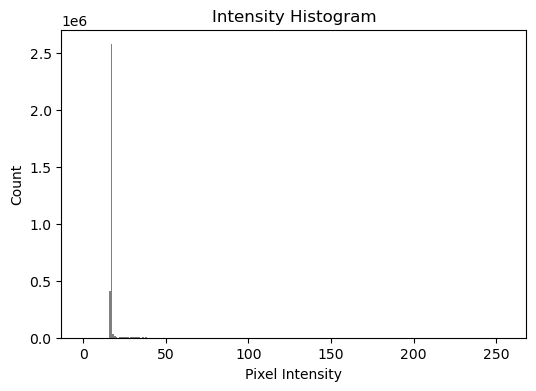

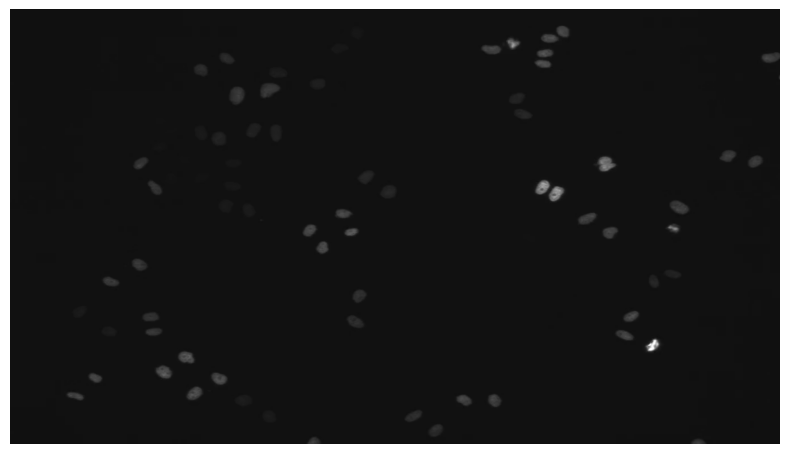

In [11]:
image_path = "/proj/aicell/users/x_aleho/video-diffusion/data/processed/idr0013/first_frames/LT0004_06-00223_01.png"
print_and_display_image_stats(image_path, show_hist=True, show_image=True)